<a href="https://colab.research.google.com/github/Mohan-this-side/pytorch_basics/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Iris Data:
The dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width and species.

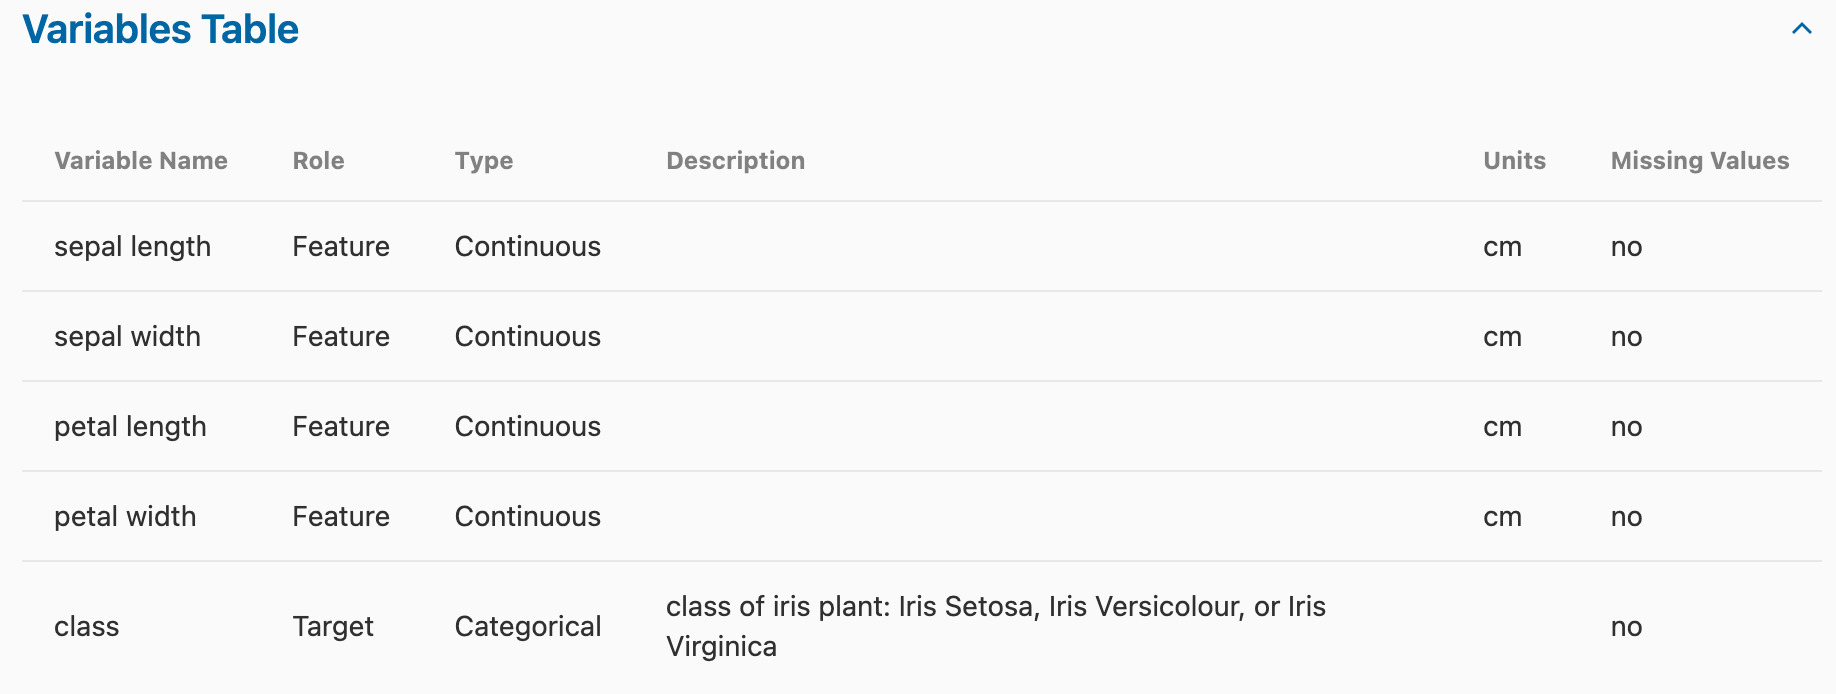

In [50]:
# Create a Model class that inherits nn.Module

class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden Layer (number of nuerons) --> H2 (n) --> Output (3 classes of iris flowers)
  def __init__(self, in_features =4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [51]:
# pick a manual seed:
torch.manual_seed(41)

In [52]:
#Create an instance of model
model = Model()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [55]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [57]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
my_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
# Change last column from strings to integers:
my_df['species'] = my_df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [60]:
my_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [61]:
# Train and Test split!

X = my_df.drop('species', axis = 1)
y = my_df['species']

In [62]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
# Convert these to numpy arrays:
X = X.values
y = y.values

In [64]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [66]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) # Long tensors are 64-bit intergers

In [67]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [68]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterian = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of interations(epochs) we should lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [69]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [70]:
# train our model:
# Epochs? (one run thru all the training data in out network)

epochs = 1000
losses = []

for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # measure the loss/error, gonna be high at first
  loss = criterian(y_pred, y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss 1.1251550912857056
Epoch: 10 and loss 1.1094492673873901
Epoch: 20 and loss 1.0956319570541382
Epoch: 30 and loss 1.0833038091659546
Epoch: 40 and loss 1.071068525314331
Epoch: 50 and loss 1.0581413507461548
Epoch: 60 and loss 1.0439516305923462
Epoch: 70 and loss 1.027901530265808
Epoch: 80 and loss 1.006042718887329
Epoch: 90 and loss 0.9842699766159058
Epoch: 100 and loss 0.9593889713287354
Epoch: 110 and loss 0.9310257434844971
Epoch: 120 and loss 0.898703932762146
Epoch: 130 and loss 0.8625795841217041
Epoch: 140 and loss 0.8231237530708313
Epoch: 150 and loss 0.7819623351097107
Epoch: 160 and loss 0.7424018383026123
Epoch: 170 and loss 0.7054346203804016
Epoch: 180 and loss 0.6709553599357605
Epoch: 190 and loss 0.6387065052986145
Epoch: 200 and loss 0.6083163022994995
Epoch: 210 and loss 0.5795047879219055
Epoch: 220 and loss 0.5519545078277588
Epoch: 230 and loss 0.5248970985412598
Epoch: 240 and loss 0.4977360665798187
Epoch: 250 and loss 0.4708419144153595
E

Text(0.5, 0, 'Epoch')

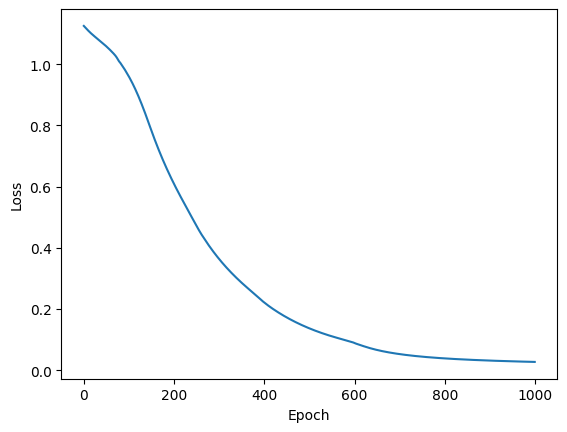

In [71]:
# graph it out!

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [72]:
# Evaluate Model on Test Data Set (Validate model on test set)

with torch.no_grad(): # Basically turning off back propogation
  y_eval = model.forward(X_test)
  loss = criterian(y_eval, y_test)

In [73]:
loss

tensor(0.1352)

In [76]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

print(f'we got {correct} correct out of {len(y_test)}')

1.) tensor([-4.2097,  3.1027,  5.9613]) 	 2 	 2
2.) tensor([-5.4811,  1.6524, 10.3069]) 	 2 	 2
3.) tensor([-6.2963,  2.5335, 10.8307]) 	 2 	 2
4.) tensor([-2.9632,  5.6004,  0.2900]) 	 1 	 1
5.) tensor([-5.2544,  2.8324,  8.3856]) 	 2 	 2
6.) tensor([-2.2055,  6.0635, -1.8728]) 	 1 	 1
7.) tensor([-4.2741,  3.7975,  5.1907]) 	 2 	 2
8.) tensor([-2.9095,  5.6451,  0.1305]) 	 1 	 1
9.) tensor([-4.7374,  3.2761,  6.7892]) 	 2 	 2
10.) tensor([-5.8593,  1.7114, 10.9744]) 	 2 	 2
11.) tensor([-4.0314,  3.7848,  4.7400]) 	 2 	 2
12.) tensor([  8.0690,  -0.9804, -13.3082]) 	 0 	 0
13.) tensor([  7.4306,  -0.8460, -12.2063]) 	 0 	 0
14.) tensor([-1.1056,  4.9963, -2.6782]) 	 1 	 1
15.) tensor([  6.6359,   0.0246, -11.7794]) 	 0 	 0
16.) tensor([-3.8506,  4.1934,  3.8630]) 	 2 	 1
17.) tensor([  7.2649,  -0.5903, -12.2169]) 	 0 	 0
18.) tensor([-4.1081,  3.2173,  5.6289]) 	 1 	 2
19.) tensor([  7.8269,  -0.9217, -12.9002]) 	 0 	 0
20.) tensor([  6.2279,   0.0903, -11.0460]) 	 0 	 0
21.) tensor